In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
n_samples = 100 # number of observations

velocity = 0.1 #velocity 

sigma_ksi = 1 # model error std
sigma_eta = 50 # sensor error std

x = np.zeros(n_samples)
z = np.zeros(n_samples)
x_opt = np.zeros(n_samples)
error = np.zeros(n_samples)

k = np.ones_like(x)
k[0] = 0.2

z[0]= x[0] + sigma_eta * np.random.randn()

for i in range(1, x.shape[0]):
    x[i] = x[i-1] + velocity * i + sigma_ksi * np.random.randn()
    z[i] = x[i] + sigma_eta * np.random.randn()

x_opt[0] = z[0]
error[0] = sigma_eta

for i in range(1, x.shape[0]):
   
    error[i] = np.sqrt(sigma_eta**2 * (error[i-1] ** 2 + sigma_eta**2 ) / (sigma_eta**2 + sigma_ksi**2 + error[i-1] ** 2))
    
    k[i] = error[i] / sigma_eta **2
    
    x_opt[i] = k[i] * z[i] + (1 - k[i]) * (x_opt[i-1] + velocity * i )


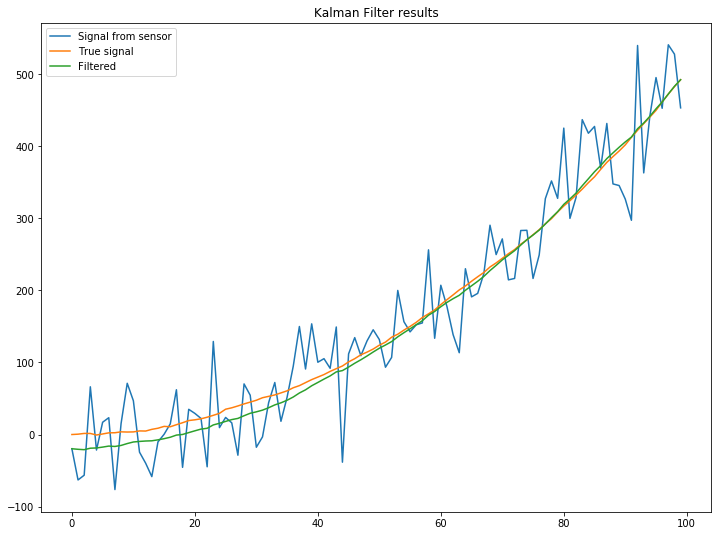

In [97]:
plt.figure(figsize = (12,9))
plt.title('Kalman Filter results')
plt.plot(z)
plt.plot(x)
plt.plot(x_opt)
plt.legend(['Signal from sensor','True signal','Filtered'])
plt.show()